In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller

In [2]:
# I removed all NaN for simplicity

R = pd.read_csv('logret_russel1000_pairtrad.csv',index_col=0)

In [3]:
R.shape

(504, 50)

In [4]:
R

,BPOP,BRK-B,BXP,BXS,C,CACI,CAG,CAH,CASY,CAT,...,CVX,CW,D,DD,DE,DGX,DIS,DISH,DLTR,DOV
index,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-0.038774,-0.036165,-0.014155,-0.027186,-0.049464,0.000000,0.008231,0.029584,0.029501,0.032661,...,-0.035246,-0.003396,-0.029081,-0.007512,-0.011594,-0.018576,0.021142,-0.024004,0.008992,-0.033617
2000-01-04,-0.033100,-0.035172,-0.016428,-0.011881,-0.063281,-0.048100,-0.019311,-0.011472,-0.026511,-0.012937,...,0.000000,0.010152,0.024293,-0.027713,-0.001459,-0.002086,0.056926,-0.037463,-0.001280,-0.018692
2000-01-05,-0.036724,0.016298,0.008248,0.000000,0.039414,-0.017544,-0.016854,0.068138,0.026511,0.023167,...,0.017778,-0.010152,0.026836,0.031945,0.023089,-0.008386,0.040664,-0.003414,0.001280,0.004344
2000-01-06,-0.005000,0.040730,0.018311,0.003976,0.047179,0.020439,0.027935,0.034141,0.008683,0.049638,...,0.041702,-0.003407,0.010845,0.027767,0.050080,0.004202,-0.040664,-0.105969,0.017744,0.004326
2000-01-07,0.000000,0.008830,0.035647,0.007905,-0.004619,-0.011628,0.021799,0.086433,0.019972,0.032164,...,0.017453,0.000000,0.000000,0.022118,-0.001358,0.039059,-0.015937,0.038050,0.035784,0.026971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-31,0.003100,0.019193,-0.005249,-0.022633,-0.013967,-0.069212,-0.005454,-0.005245,-0.006689,-0.017830,...,-0.009220,-0.006471,0.008354,0.000889,-0.010027,0.009951,-0.011039,0.006208,-0.021444,0.000810
2002-01-02,-0.018744,-0.016371,0.006557,-0.018238,0.010445,0.022782,0.003360,-0.009322,-0.027213,-0.011549,...,-0.001451,0.000419,0.010757,0.012065,-0.005973,-0.031879,0.034625,0.045543,-0.010080,-0.000270
2002-01-03,0.010110,-0.005652,0.003393,0.037331,0.000784,-0.023289,-0.016488,-0.001719,0.019126,0.013079,...,0.000223,-0.009465,-0.004124,0.035908,0.021653,-0.025665,0.030758,-0.009085,-0.008203,0.018183


<Axes: xlabel='index'>

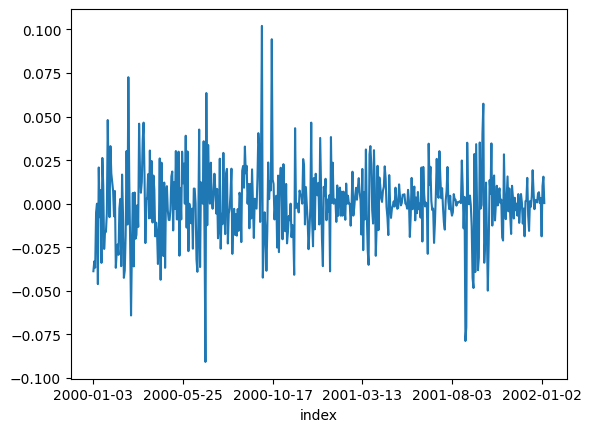

In [5]:
#Everytime you load a dataset try to plot it, to check for errors
R['BPOP'].plot()

<Axes: xlabel='index'>

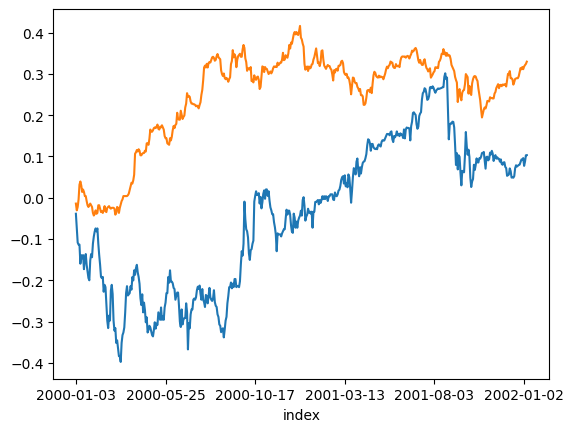

In [6]:
#Since these are log-price the cumulative sum will be a value proportional to the log-price
R['BPOP'].cumsum().plot()
R['BXP'].cumsum().plot()

In [7]:
R.cumsum(axis=0).values.T

array([[-0.0387735 , -0.07187348, -0.1085971 , ...,  0.08732475,
         0.10281244,  0.10315427],
       [-0.03616525, -0.07133743, -0.05503913, ...,  0.29990228,
         0.29462516,  0.29543885],
       [-0.0141553 , -0.03058322, -0.02233556, ...,  0.32119493,
         0.32405701,  0.32949815],
       ...,
       [-0.02400357, -0.06146631, -0.06488053, ..., -0.68092099,
        -0.67741717, -0.6659408 ],
       [ 0.00899169,  0.00771209,  0.00899169, ...,  0.47917404,
         0.47421945,  0.4588704 ],
       [-0.03361666, -0.05230875, -0.04796452, ..., -0.13314288,
        -0.11009357, -0.11684844]])

In [8]:
# log-prices
P = R.cumsum(axis=0).T.values # .T is to transpose. Usually I work with the time by colum, but it is only my convetion

In [9]:
# log-returns
R = R.values.T

In [10]:
#Calbration size
tin = 252

In [11]:
#in-sample out-of-sample
Pin,Pout = P[: , :tin],P[:,tin:]
Rin,Rout = R[:,:tin],R[:,tin:]

In [12]:
#Before using a new library check always the help
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [13]:
#The second number is the pvalue. This price is not stationary
adfuller(Pin[0])

(-1.790662228025123,
 0.3851073938084686,
 0,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 -1092.872338270547)

In [14]:
#The first difference has a very low p-value. It'sstationary. Then the time-series 0 is I(1)
adfuller(Rin[0])

(-15.9305285204072,
 7.738824063204214e-29,
 0,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 -1090.973181370277)

In [15]:
# Let us select all the series that are I(1). Non significant adfuller on price, and sigificant on returns
# "sel" is an array that contains all the index where the condition is true
sel = np.array( [i for i in range(len(Pin)) if (adfuller(Rin[i])[1]<0.01) and adfuller(Pin[i])[1]>0.01] ) 


Pin,Rin = Pin[sel],Rin[sel]
Pout,Rout = Pout[sel],Rout[sel]

In [16]:
#All the prices are I(1) processes
len(sel),len(Pin)

(50, 50)

In [17]:
#N -elements
N = len(Pin)

In [18]:
#Check the new library
help(coint)

Help on function coint in module statsmodels.tsa.stattools:

coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag: 'str | None' = 'aic', return_results=None)
    Test for no-cointegration of a univariate equation.
    
    The null hypothesis is no cointegration. Variables in y0 and y1 are
    assumed to be integrated of order 1, I(1).
    
    This uses the augmented Engle-Granger two-step cointegration test.
    Constant or trend is included in 1st stage regression, i.e. in
    cointegrating equation.
    
    **Warning:** The autolag default has changed compared to statsmodels 0.8.
    In 0.8 autolag was always None, no the keyword is used and defaults to
    "aic". Use `autolag=None` to avoid the lag search.
    
    Parameters
    ----------
    y0 : array_like
        The first element in cointegrated system. Must be 1-d.
    y1 : array_like
        The remaining elements in cointegrated system.
    trend : str {"c", "ct"}
        The trend term included in regression for 

In [19]:
#The p-value or the first two time-series is not significant
coint(Pin[0],Pin[1])

(-2.7358718534462887,
 0.18694297256946374,
 array([-3.94060523, -3.36058133, -3.06139039]))

In [20]:
# Let us compute  all cointegration p-values
# If I create a list of tuple (pvalue, (i,j)) and a sort it, then it will be sorted according the fist element,i.e., the pvalue
C = sorted([(coint(Pin[i],Pin[j])[1],(i,j)) for i in range(N) for j in range(N) if i!=j])

In [21]:
#The first pvalues are low, but we are doing a multiple comparison test. We need to correct it
C[:10]

[(1.5406473348454891e-06, (45, 2)),
 (2.578617667695633e-06, (2, 45)),
 (1.7570948719029243e-05, (8, 22)),
 (0.00037819678946319086, (14, 11)),
 (0.0005271795902764956, (11, 14)),
 (0.0007188732412299978, (22, 8)),
 (0.0008101907404794622, (37, 8)),
 (0.0012745931423452821, (8, 37)),
 (0.0014427078974618408, (12, 17)),
 (0.0014926648152895467, (42, 11))]

In [22]:
#Bonferroni correction
thr = 0.01/len(C)
print(thr)

4.081632653061224e-06


In [23]:
#I select only the pairs with pvalue smaller than the Bonferronin threshold
pairs = list( filter(lambda x: x[0]<thr,C) )

In [24]:
len(pairs),len(C) #Only the first pair is significantly cointegrated

(2, 2450)

In [25]:
# Select one of the cointegrated pair
i,j = pairs[0][1]

Text(0.5, 1.0, 'in-sample')

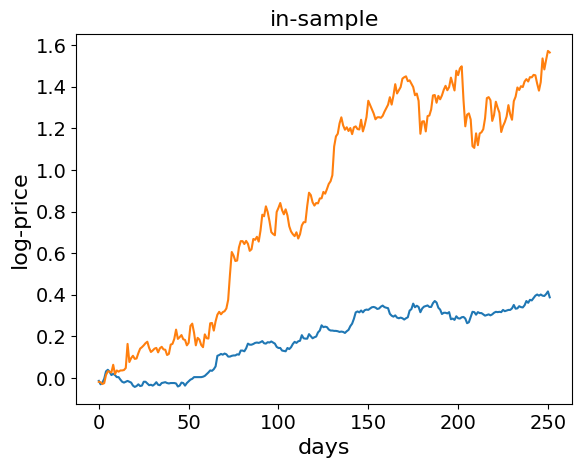

In [26]:
# Visual representation of the log-price of the selected stocks
plt.plot(Pin[j])
plt.plot(Pin[i])
plt.tick_params(labelsize=14)
plt.xlabel('days',fontsize=16)
plt.ylabel('log-price',fontsize=16)
plt.title('in-sample',fontsize=16)

In [27]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [28]:
#The linear regression wants a nx1 matrix not a vector of dimension n.

In [29]:
Pin[j]

array([-0.0141553 , -0.03058322, -0.02233556, -0.00402412,  0.03162311,
        0.03937558,  0.02967634,  0.01395868,  0.01988139,  0.01395868,
        0.00400818,  0.00400818, -0.00806456, -0.01823717, -0.02233556,
       -0.01823717, -0.0141553 , -0.01823717, -0.02233556, -0.03681379,
       -0.04308287, -0.03889914, -0.03058322, -0.03889914, -0.03681379,
       -0.01823717, -0.01823717, -0.02645109, -0.03473257, -0.03265555,
       -0.03681379, -0.03058322, -0.02028469, -0.03265555, -0.03473257,
       -0.02439071, -0.02233556, -0.02028469, -0.02439071, -0.02645109,
       -0.02439071, -0.02439071, -0.02439071, -0.02645109, -0.04098872,
       -0.03681379, -0.02233556, -0.02439071, -0.03681379, -0.02439071,
       -0.01619422, -0.00806456, -0.00402412,  0.00400818,  0.00400818,
        0.00400818,  0.00400818,  0.00400818,  0.00600629,  0.00998994,
        0.01842624,  0.0263942 ,  0.03626601,  0.03429924,  0.04214259,
        0.05572217,  0.10643678,  0.110093  ,  0.11555244,  0.11

In [30]:
Pin_j = Pin[j].reshape((tin,1))
Pin_j

array([[-0.0141553 ],
       [-0.03058322],
       [-0.02233556],
       [-0.00402412],
       [ 0.03162311],
       [ 0.03937558],
       [ 0.02967634],
       [ 0.01395868],
       [ 0.01988139],
       [ 0.01395868],
       [ 0.00400818],
       [ 0.00400818],
       [-0.00806456],
       [-0.01823717],
       [-0.02233556],
       [-0.01823717],
       [-0.0141553 ],
       [-0.01823717],
       [-0.02233556],
       [-0.03681379],
       [-0.04308287],
       [-0.03889914],
       [-0.03058322],
       [-0.03889914],
       [-0.03681379],
       [-0.01823717],
       [-0.01823717],
       [-0.02645109],
       [-0.03473257],
       [-0.03265555],
       [-0.03681379],
       [-0.03058322],
       [-0.02028469],
       [-0.03265555],
       [-0.03473257],
       [-0.02439071],
       [-0.02233556],
       [-0.02028469],
       [-0.02439071],
       [-0.02645109],
       [-0.02439071],
       [-0.02439071],
       [-0.02439071],
       [-0.02645109],
       [-0.04098872],
       [-0

In [31]:
# Linear regression of j on i
rgfit = LinearRegression().fit( Pin_j,Pin[i])

#With predict we obtain the regression of j in i. 
rgVar = rgfit.predict( Pin_j )

Text(0.5, 1.0, 'in-sample')

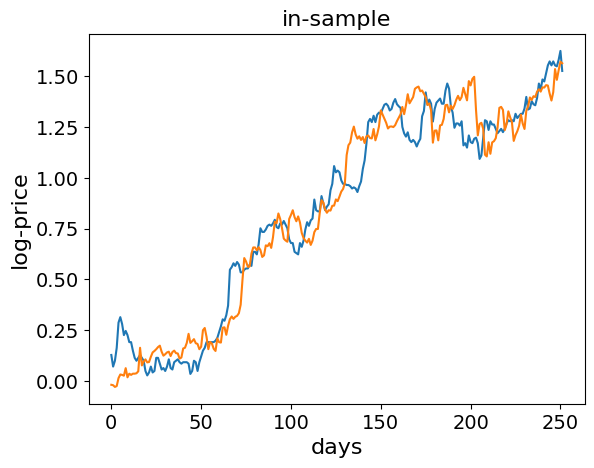

In [32]:
# Visual representation of the log-price of one stock and the regression of the other
plt.plot(rgVar)
plt.plot(Pin[i])
plt.tick_params(labelsize=14)
plt.xlabel('days',fontsize=16)
plt.ylabel('log-price',fontsize=16)
plt.title('in-sample',fontsize=16)

In [33]:
# residue of the regression
u = Pin[i]-rgVar

Text(0.5, 1.0, 'in-sample')

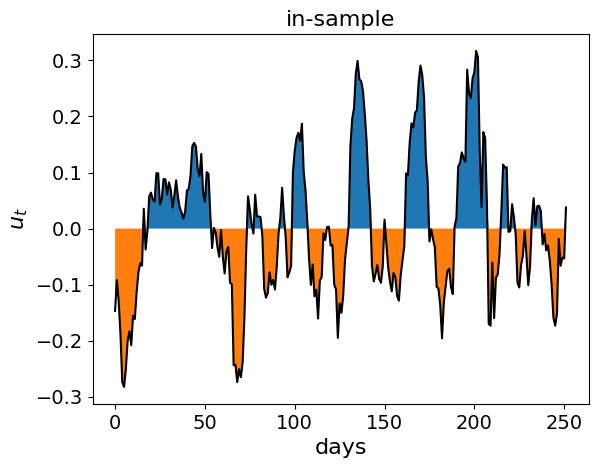

In [34]:
# Visual representation of te regression variable. It looks like stationary
plt.plot(u,color='k')
plt.fill_between(range(tin),0,np.clip(u,0,np.inf))
plt.fill_between(range(tin),np.clip(u,-np.inf,0),0)
plt.xlabel('days',fontsize=16)
plt.tick_params(labelsize=14)
plt.ylabel(r'$u_t$',fontsize=16)
plt.title('in-sample',fontsize=16)

In [35]:
# Here we start the characterization of the ARMA(p,q) as TD2

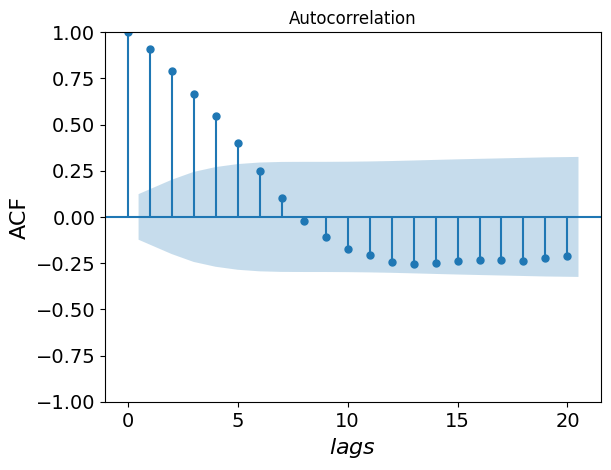

In [36]:
sm.graphics.tsa.plot_acf(u, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

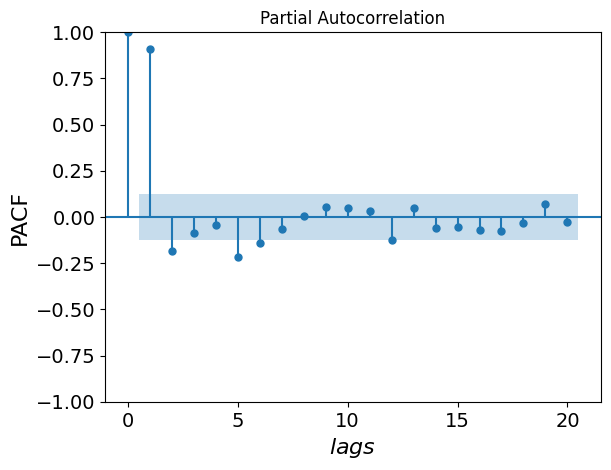

In [37]:
sm.graphics.tsa.plot_pacf(u, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [38]:
models = [(1,1),
          (2,1),
          (1,2),
          (2,2),
          (3,1),
          (3,2),
          (1,3)] 
#No pure AR or MA unless you want to include extreamly large lags (252 days are not a lot)

In [39]:
# I create a diction with the result of the fits
M = {}
for p,q in models:
    #fit an arma
    print(p,q)
    ft = ARIMA(u,order=(p,0,q)).fit()
    M[p,q] = ft
#The model too complex cannot be fitted with 252, so we have convergence errors

1 1
2 1
1 2
2 2


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 1


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 2


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1 3


In [40]:
AIC = pd.DataFrame( [((p,q),ft.aic) for (p,q),ft in M.items()],columns=['model','AIC'] ) 
AIC

,model,AIC
0,"(1, 1)",-770.311420
1,"(2, 1)",-780.110241
2,"(1, 2)",-770.993268
3,"(2, 2)",-769.752082
4,"(3, 1)",-769.909499
5,"(3, 2)",-767.589502
6,"(1, 3)",-769.209805


In [41]:
#We are not insterested in the absolute value but in de difference with the minimum values
AIC = AIC.assign(dAIC=(AIC.AIC - AIC.AIC.min()))

#Only an ARMA(2,1) seems acceptable
AIC.sort_values('AIC')

,model,AIC,dAIC
1,"(2, 1)",-780.110241,0.000000
2,"(1, 2)",-770.993268,9.116972
0,"(1, 1)",-770.311420,9.798821
4,"(3, 1)",-769.909499,10.200742
3,"(2, 2)",-769.752082,10.358159
6,"(1, 3)",-769.209805,10.900436
5,"(3, 2)",-767.589502,12.520739


In [42]:
#Maybe is more convenient to reset the index
AIC = AIC.sort_values('AIC').reset_index(drop=True)

In [43]:
p,q = AIC.model[0]

In [44]:
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 395.055
Date:                Mon, 16 Sep 2024   AIC                           -780.110
Time:                        16:51:20   BIC                           -762.463
Sample:                             0   HQIC                          -773.009
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.015      0.264      0.792      -0.025       0.033
ar.L1          1.8285      0.056     32.767      0.000       1.719       1.938
ar.L2         -0.8663      0.048    -18.187      0.000      -0.960      -0.773
ma.L1         -0.8306      0.081    -10.247      0.000      -0.989      -0.672
sigma2         0.0025      0.000     14.036      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                22.45
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#All the coefficient are significant

In [46]:
r = M[p,q].resid

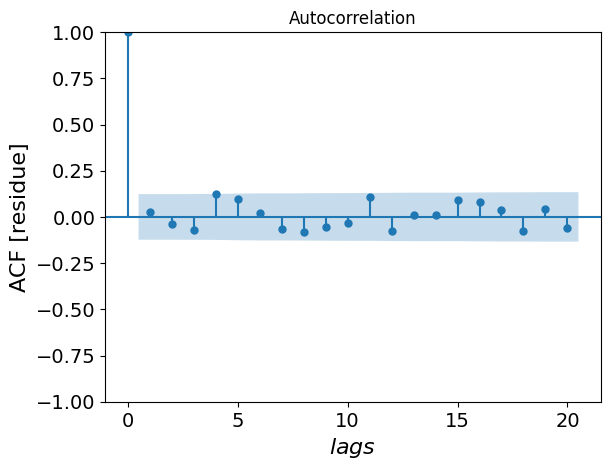

In [47]:
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [48]:
acorr_ljungbox(r,lags=p+q+5,model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
1,0.181038,NaN
2,0.611142,NaN
3,1.932651,NaN
4,5.960127,0.014633
5,8.494844,0.014301
6,8.584559,0.035356
7,9.692092,0.045946
8,11.402606,0.043957


In [49]:
#It is on the limit to be accepted (small p-value)

In [50]:
#Now let us look at the out-of-sample persistence

In [51]:
# Evaluate the regression with the same parameters obtained in-sample
Pj = P[j].reshape((len(P[j]),1))
rgVar = rgfit.predict(Pj)

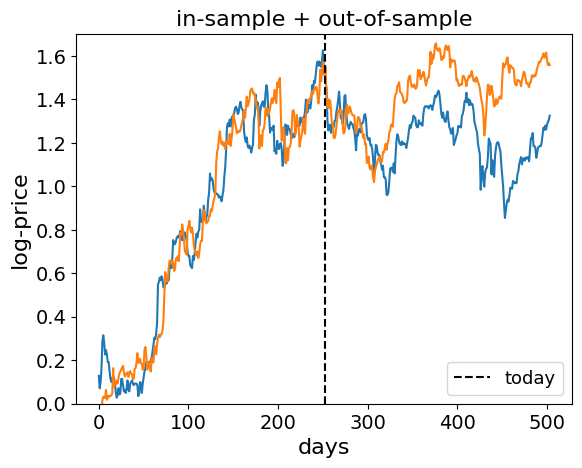

In [52]:
# It seems that after a month the cointegration is lost
plt.plot(rgVar)
plt.plot(P[i])
plt.vlines(tin,0,1.7,ls='--',color='k',label='today')
plt.ylim([0,1.7])
plt.xlabel('days',fontsize=16)
plt.tick_params(labelsize=14)
plt.ylabel(r'log-price',fontsize=16)
plt.title('in-sample + out-of-sample',fontsize=16)
plt.legend(loc='lower right',fontsize=13)

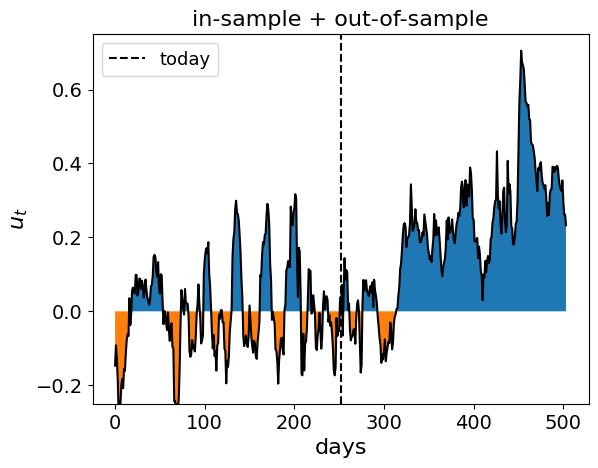

In [53]:
# The residue of the regression show a very large positive run which is incompatible with ARMA(2,1)
u =  (P[i]-rgVar) 
plt.plot(u,color='k')
plt.vlines(tin,-0.25,0.75,ls='--',color='k',label='today')

plt.fill_between(range(2*tin),0,np.clip(u,0,np.inf))
plt.fill_between(range(2*tin),np.clip(u,-np.inf,0),0)
plt.ylim([-0.25,0.75])
plt.xlabel('days',fontsize=16)
plt.tick_params(labelsize=14)
plt.ylabel(r'$u_t$',fontsize=16)
plt.title('in-sample + out-of-sample',fontsize=16)
plt.legend(loc='upper left',fontsize=13)

In [54]:
# On the out-of-sample there is no overfitting so we can use adfuller

In [55]:
adfuller( (P[i]-rgVar)[tin:] )

(-2.237799619670746,
 0.19281342648624006,
 0,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 -817.3541478587906)

In [56]:
# we cannot guarantee that in the out-of-sample is stationary